# Segmentasi Citra

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

(900, 900, 3)


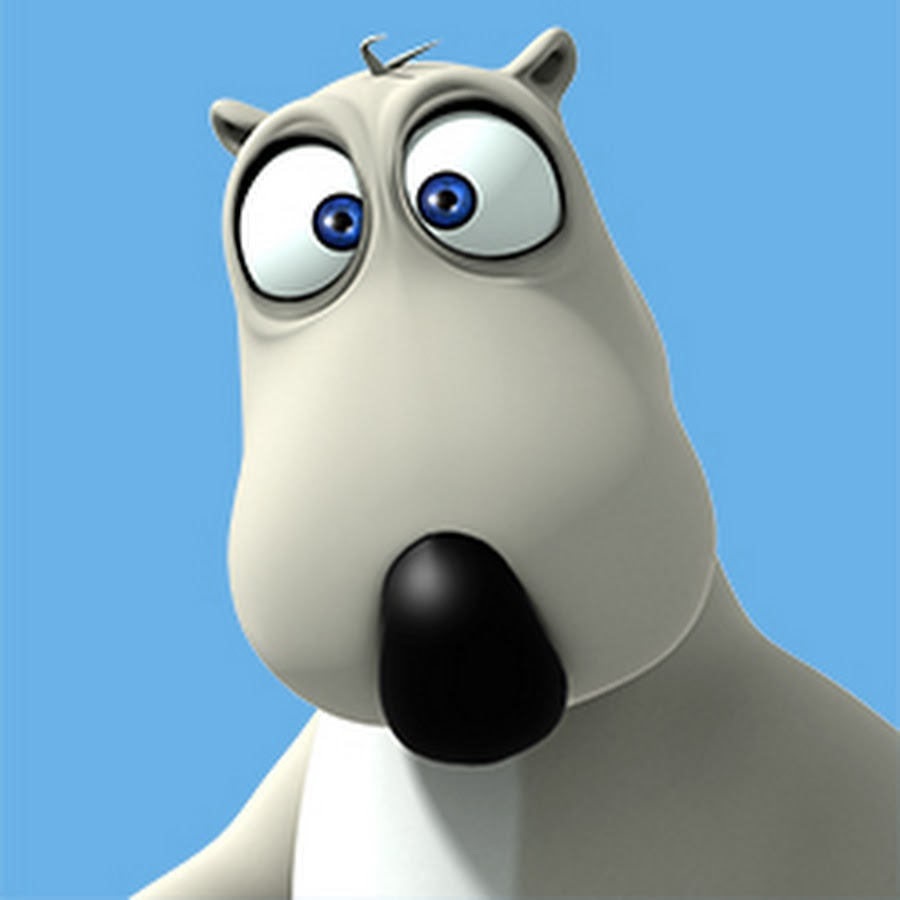

In [2]:
img = cv2.imread('bernard.jpg')
print(img.shape)
cv2_imshow(img)

In [3]:
# resize
from PIL import Image

# Image.open() can also open other image types
img = Image.open("bernard.jpg")
# WIDTH and HEIGHT are integers
resized_img = img.resize((255, 255))
resized_img.save("bernard_image.jpg")

(255, 255, 3)


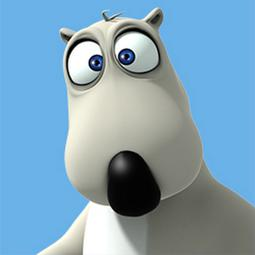

In [20]:
img = cv2.imread('bernard_image.jpg')
print(img.shape)
cv2_imshow(img)

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

In [6]:
h,w = img.shape[:2]
print(f'resolusi citra {w}x{h}')

resolusi citra 255x255


## Tresholding

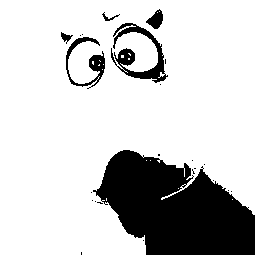

In [10]:
thresh_img = np.zeros([h,w], dtype='uint8')
for y in range(h):
  for x in range(w):
    r = img[y,x,0]
    g = img[y,x,1]
    b = img[y,x,2]
    gray = (r*0.2989) + (g*0.5870) + (b*0.1140)
    if gray >= 128:
      thresh_img[y,x] = 255
    else:
      thresh_img[y,x] = 0
cv2_imshow(thresh_img)

## Segmentasi Warna

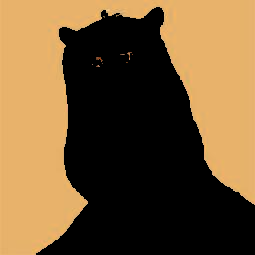

In [21]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
yellow_lower = np.array([10, 100, 100])
yellow_upper = np.array([30, 255, 255])
mask = cv2.inRange(hsv_img, yellow_lower, yellow_upper)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
segment = cv2.bitwise_and(img, mask)
cv2_imshow(segment)

## Deteksi Tepi

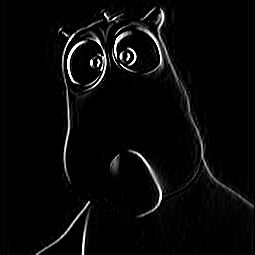

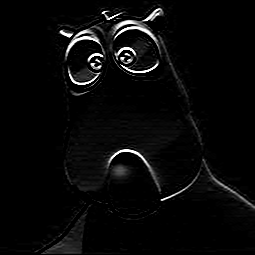

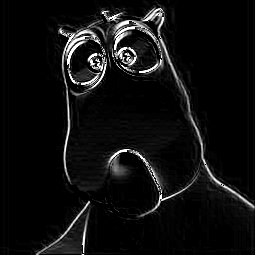

-1

In [9]:
gx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Ix = cv2.filter2D(gray_img, -1, gx)
Iy = cv2.filter2D(gray_img, -1, gy)
res_sobel = abs(Ix + Iy)
cv2_imshow(Ix)
cv2_imshow(Iy)
cv2_imshow(res_sobel)
cv2.waitKey(0)

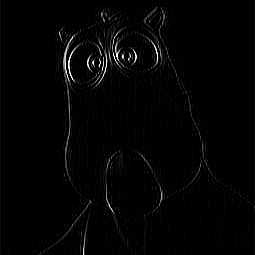

In [22]:
img_garis = cv2.imread('bernard_image.jpg')
gray_img = cv2.cvtColor(img_garis, cv2.COLOR_BGR2GRAY)
kernel = np.array([
  [-1,2,-1]              ,
  [-1,2,-1],
  [-1,2,-1]
])
result_img = cv2.filter2D(gray_img, -1, kernel)
cv2_imshow(result_img)

(255, 255)


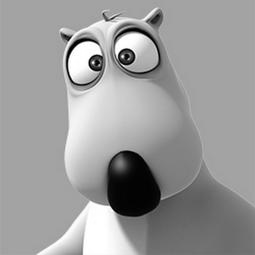

In [23]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray_img.shape)
cv2_imshow(gray_img)

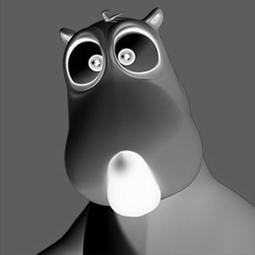

In [24]:
negative_img = np.zeros([h,w], dtype='uint8')

for y in range(h):
  for x in range(w):
    pix = gray_img[y,x]
    negative_img[y,x] = 256 - 1 - pix

cv2_imshow(negative_img)

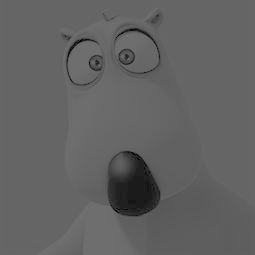

In [25]:
trans_log_img = np.zeros([h,w], dtype='uint8')

for y in range(h):
  for x in range(w):
    pix = gray_img[y,x]
    val = 20 * np.log(1 + pix)
    if val > 255:
      val = 255
    if val < 0:
      val = 0
    trans_log_img[y,x] = val

cv2_imshow(trans_log_img)

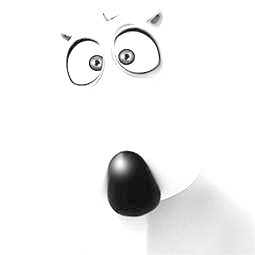

In [26]:
powlaw_log_img = np.zeros([h,w], dtype='uint8')

for y in range(h):
  for x in range(w):
    pix = gray_img[y,x]
    val = 10 * np.power(pix, 0.67)
    if val > 255:
      val = 255
    if val < 0:
      val = 0
    powlaw_log_img[y,x] = val

cv2_imshow(powlaw_log_img)

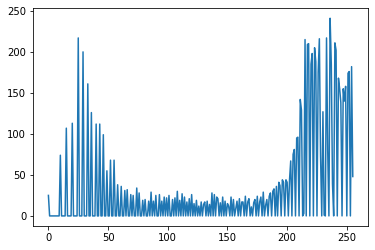

In [27]:
hist = np.zeros([256], dtype='uint8')

for y in range(h):
  for x in range(w):
    pix = powlaw_log_img[y,x]
    hist[pix] += 1

plt.plot(hist)

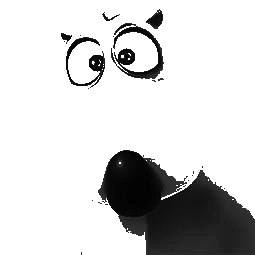

In [28]:
hist_eq_img = cv2.equalizeHist(powlaw_log_img)
cv2_imshow(hist_eq_img)

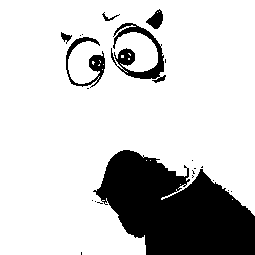

In [29]:
(thresh, thresh_img) = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh_img)

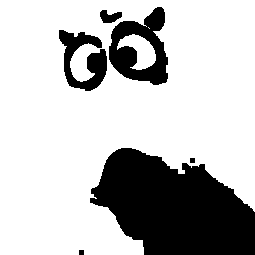

In [30]:
kernel = np.ones((5, 5), np.uint8)
erode_img = cv2.erode(thresh_img, kernel)
cv2_imshow(erode_img)

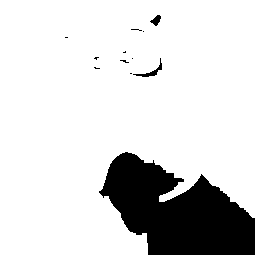

In [31]:
kernel = np.ones((5, 5), np.uint8)
dilate_img = cv2.dilate(thresh_img, kernel)
cv2_imshow(dilate_img)

## Ekstraksi Fitur Citra

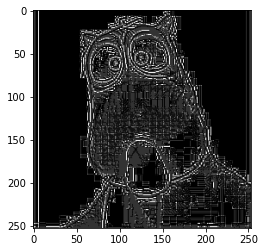

In [32]:
def lbp_calc(img_src, pix_value, curr_x, curr_y):
  result = 0
  count = 0
  for y in range(3):
    for x in range(3):
      if y != 1 and x != 1:
        if img_src[curr_y+y, curr_x+x] > pix_value:
          result += 2 ** count
          count += 1
  return result

img = cv2.imread('bernard_image.jpg')
h, w = img.shape[:2]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

lbp_img = np.zeros([h-2,w-2], dtype='uint8')
for y in range(1,h-1):
  for x in range(1,w-1):
    pix_value = gray_img[y,x]
    lbp_img[y-1,x-1] = lbp_calc(gray_img, pix_value, x-1, y-1)

plt.imshow(lbp_img, cmap="gray")
plt.show()